# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

# Question 1

**Explain how you solve the model**

Test

Test 2

In [2]:
# code for solving the model (remember documentation and comments)

a = np.array([1,2,3])
b = inauguralproject.square(a)
print(b)

[1 4 9]


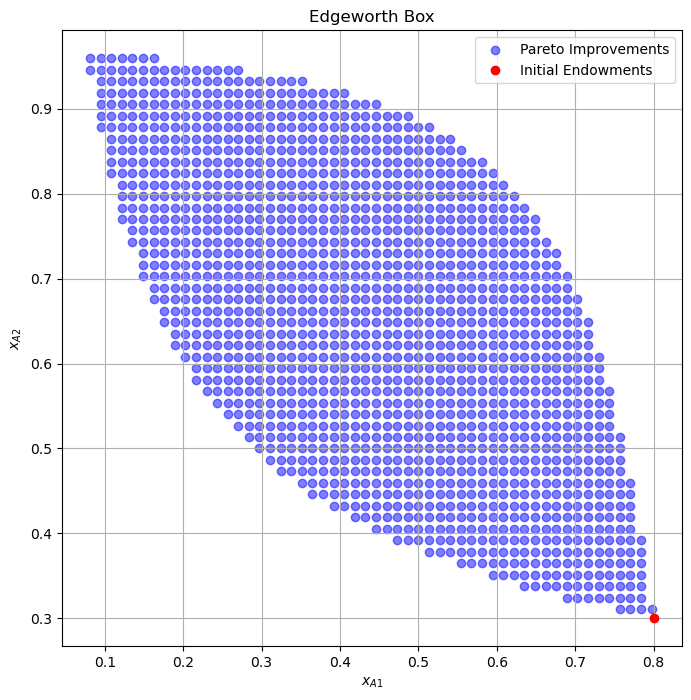

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 1/3
beta = 2/3
omega_A1 = 0.8
omega_A2 = 0.3
N = 75

# Utility functions
def uA(x1, x2):
    return (x1**alpha) * (x2**(1-alpha))

def uB(x1, x2):
    return (x1**beta) * (x2**(1-beta))

# Initial utility levels
uA_initial = uA(omega_A1, omega_A2)
uB_initial = uB(1-omega_A1, 1-omega_A2)

# Edgeworth box
x_A1 = np.linspace(0, 1, N)
x_A2 = np.linspace(0, 1, N)
X_A1, X_A2 = np.meshgrid(x_A1, x_A2)

# Calculating utilities
U_A = uA(X_A1, X_A2)
U_B = uB(1-X_A1, 1-X_A2)

# Finding Pareto improvements
pareto_mask = (U_A >= uA_initial) & (U_B >= uB_initial)

# Plotting
plt.figure(figsize=(8, 8))
plt.scatter(X_A1[pareto_mask], X_A2[pareto_mask], color='blue', label='Pareto Improvements', alpha=0.5)
plt.plot(omega_A1, omega_A2, 'ro', label='Initial Endowments')
plt.xlabel('$x_{A1}$')
plt.ylabel('$x_{A2}$')
plt.title('Edgeworth Box')
plt.legend()
plt.grid(True)
plt.show()


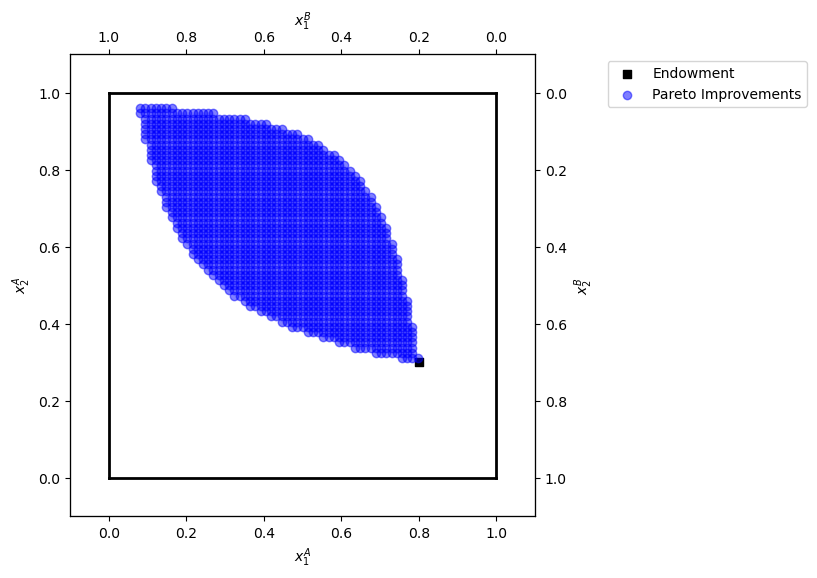

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 1/3
beta = 2/3
N = 75  # Grid size for the plot
omega_A1 = 0.8
omega_A2 = 0.3
w1bar = 1.0
w2bar = 1.0

# Utility functions
def uA(x1, x2):
    return (x1**alpha) * (x2**(1-alpha))

def uB(x1, x2):
    return (x1**beta) * (x2**(1-beta))

# Initial utility
uA_initial = uA(omega_A1, omega_A2)
uB_initial = uB(w1bar - omega_A1, w2bar - omega_A2)

# Figure setup
fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plotting endowment
ax_A.scatter(omega_A1, omega_A2, marker='s', color='black', label='Endowment')

# Plotting Edgeworth Box
ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

# Calculating and plotting the Pareto improvements
x_A1 = np.linspace(0, w1bar, N)
x_A2 = np.linspace(0, w2bar, N)
X_A1, X_A2 = np.meshgrid(x_A1, x_A2)

U_A = uA(X_A1, X_A2)
U_B = uB(w1bar-X_A1, w2bar-X_A2)

pareto_improvement_mask = (U_A >= uA_initial) & (U_B >= uB_initial)

ax_A.scatter(X_A1[pareto_improvement_mask], X_A2[pareto_improvement_mask], color='blue', alpha=0.5, label='Pareto Improvements')

# Adjusting limits and showing plot
ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))
plt.show()


# Question 2

Explain your code and procedure

In [5]:
import numpy as np

# Given parameters
N = 75  # Adjust N for the desired granularity of P1
alpha = 1/3
beta = 2/3
omega_A1 = 0.8
omega_A2 = 0.3
p2 = 1  # Numeraire

# Generating P1 values
P1 = np.linspace(0.5, 2.5, N)

# Demand functions for consumers A and B for goods 1 and 2
def demand_A1(p1, omega_A1, omega_A2, alpha, p2=1):
    return alpha * ((p1 * omega_A1 + p2 * omega_A2) / p1)

def demand_A2(p1, omega_A1, omega_A2, alpha, p2=1):
    return (1 - alpha) * ((p1 * omega_A1 + p2 * omega_A2) / p2)

def demand_B1(p1, omega_B1, omega_B2, beta, p2=1):
    return beta * ((p1 * omega_B1 + p2 * omega_B2) / p1)

def demand_B2(p1, omega_B1, omega_B2, beta, p2=1):
    return (1 - beta) * ((p1 * omega_B1 + p2 * omega_B2) / p2)

# Initialize arrays to store the errors
epsilon_1 = np.zeros(N)
epsilon_2 = np.zeros(N)

# Calculate errors for each p1 in P1
for i, p1 in enumerate(P1):
    omega_B1 = 1 - omega_A1
    omega_B2 = 1 - omega_A2
    
    xA1 = demand_A1(p1, omega_A1, omega_A2, alpha, p2)
    xA2 = demand_A2(p1, omega_A1, omega_A2, alpha, p2)
    xB1 = demand_B1(p1, omega_B1, omega_B2, beta, p2)
    xB2 = demand_B2(p1, omega_B1, omega_B2, beta, p2)
    
    # Calculate market clearing errors for goods 1 and 2
    epsilon_1[i] = xA1 + xB1 - 1
    epsilon_2[i] = xA2 + xB2 - 1

# Display results (or process them further as needed)
for p1, e1, e2 in zip(P1, epsilon_1, epsilon_2):
    print(f"p1 = {p1:.2f}, epsilon_1 = {e1:.4f}, epsilon_2 = {e2:.4f}")


p1 = 0.50, epsilon_1 = 0.5333, epsilon_2 = -0.2667
p1 = 0.53, epsilon_1 = 0.4752, epsilon_2 = -0.2505
p1 = 0.55, epsilon_1 = 0.4228, epsilon_2 = -0.2342
p1 = 0.58, epsilon_1 = 0.3752, epsilon_2 = -0.2180
p1 = 0.61, epsilon_1 = 0.3319, epsilon_2 = -0.2018
p1 = 0.64, epsilon_1 = 0.2922, epsilon_2 = -0.1856
p1 = 0.66, epsilon_1 = 0.2558, epsilon_2 = -0.1694
p1 = 0.69, epsilon_1 = 0.2222, epsilon_2 = -0.1532
p1 = 0.72, epsilon_1 = 0.1912, epsilon_2 = -0.1369
p1 = 0.74, epsilon_1 = 0.1624, epsilon_2 = -0.1207
p1 = 0.77, epsilon_1 = 0.1357, epsilon_2 = -0.1045
p1 = 0.80, epsilon_1 = 0.1107, epsilon_2 = -0.0883
p1 = 0.82, epsilon_1 = 0.0874, epsilon_2 = -0.0721
p1 = 0.85, epsilon_1 = 0.0656, epsilon_2 = -0.0559
p1 = 0.88, epsilon_1 = 0.0451, epsilon_2 = -0.0396
p1 = 0.91, epsilon_1 = 0.0259, epsilon_2 = -0.0234
p1 = 0.93, epsilon_1 = 0.0077, epsilon_2 = -0.0072
p1 = 0.96, epsilon_1 = -0.0094, epsilon_2 = 0.0090
p1 = 0.99, epsilon_1 = -0.0256, epsilon_2 = 0.0252
p1 = 1.01, epsilon_1 = -0.0409,

# Question 3

Explain your code and procedure

In [4]:
import numpy as np
from scipy.optimize import minimize_scalar

# Assuming utility functions, demand functions, and parameters are defined outside this snippet

# Market clearing error function for goods 1 and 2
def market_clearing_error(p1):
    # Calculate demands for A and B
    xA1 = demand_A1(p1, p2, omega_A1, omega_A2, alpha)
    xA2 = demand_A2(p1, p2, omega_A1, omega_A2, alpha)
    omega_B1 = 1 - omega_A1
    omega_B2 = 1 - omega_A2
    xB1 = demand_B1(p1, p2, omega_B1, omega_B2, beta)
    xB2 = demand_B2(p1, p2, omega_B1, omega_B2, beta)
    
    # Compute market clearing errors
    epsilon_1 = xA1 + xB1 - 1
    epsilon_2 = xA2 + xB2 - 1
    
    # Return the absolute sum of errors
    return abs(epsilon_1) + abs(epsilon_2)

# Find the market-clearing price by minimizing the error
result = minimize_scalar(market_clearing_error, bounds=(0.5, 2.5), method='bounded')

# Display the market-clearing price
print(f"Market-clearing price p1: {result.x}")


Market-clearing price p1: 0.9444428544211817


In [7]:
from scipy.optimize import minimize
import numpy as np

# Example utility function for A and B, replace with your actual functions
def uA(x1, x2):
    return (x1 ** alpha) * (x2 ** (1 - alpha))

def uB(x1, x2):
    return (x1 ** beta) * (x2 ** (1 - beta))

# Example constraints ensuring B is not worse off, replace with your actual constraints
def constraint_B(x):
    # x[0] = x1, x[1] = x2 for consumer A; calculate consumer B's x1 and x2 as 1 - x[0] and 1 - x[1]
    return uB(1 - x[0], 1 - x[1]) - initial_uB

# Parameters (placeholders, replace with your values)
alpha = 1/3
beta = 2/3
initial_uB = 0.5  # Placeholder, compute the actual initial utility for B

# 4.a Optimize utility for A for each price in P1
P1 = np.linspace(0.5, 2.5, 75)  # Adjust as per your task definition
for p1 in P1:
    res = minimize(lambda x: -uA(x[0], x[1]), [0.5, 0.5], constraints={'type': 'ineq', 'fun': constraint_B})
    if res.success:
        print(f"Max utility for A at p1={p1}: {-res.fun}, with allocation: {res.x}")

# 4.b Find the optimal p1 price that maximizes A's utility
def objective(p1):
    # Optimize A's utility given p1, including constraint for B
    # This requires integrating the price into your utility or demand calculations
    res = minimize(lambda x: -uA(x[0], x[1]), [0.5, 0.5], constraints={'type': 'ineq', 'fun': constraint_B})
    return -res.fun if res.success else np.inf

res_p1 = minimize_scalar(objective, bounds=(0.5, 2.5), method='bounded')
if res_p1.success:
    optimal_p1 = res_p1.x
    print(f"Optimal p1: {optimal_p1}")


Max utility for A at p1=0.5: 0.5580683652734503, with allocation: [0.36133622 0.69354614]
Max utility for A at p1=0.527027027027027: 0.5580683652734503, with allocation: [0.36133622 0.69354614]
Max utility for A at p1=0.5540540540540541: 0.5580683652734503, with allocation: [0.36133622 0.69354614]
Max utility for A at p1=0.5810810810810811: 0.5580683652734503, with allocation: [0.36133622 0.69354614]
Max utility for A at p1=0.6081081081081081: 0.5580683652734503, with allocation: [0.36133622 0.69354614]
Max utility for A at p1=0.6351351351351351: 0.5580683652734503, with allocation: [0.36133622 0.69354614]
Max utility for A at p1=0.6621621621621622: 0.5580683652734503, with allocation: [0.36133622 0.69354614]
Max utility for A at p1=0.6891891891891893: 0.5580683652734503, with allocation: [0.36133622 0.69354614]
Max utility for A at p1=0.7162162162162162: 0.5580683652734503, with allocation: [0.36133622 0.69354614]
Max utility for A at p1=0.7432432432432432: 0.5580683652734503, with al

In [8]:
from scipy.optimize import minimize
import numpy as np

# Example utility function for A and B, replace with your actual functions
def uA(x1, x2):
    return (x1 ** alpha) * (x2 ** (1 - alpha))

def uB(x1, x2):
    return (x1 ** beta) * (x2 ** (1 - beta))

# Example constraints ensuring B is not worse off, replace with your actual constraints
def constraint_B(x):
    # x[0] = x1, x[1] = x2 for consumer A; calculate consumer B's x1 and x2 as 1 - x[0] and 1 - x[1]
    return uB(1 - x[0], 1 - x[1]) - initial_uB

# Parameters (placeholders, replace with your values)
alpha = 1/3
beta = 2/3
initial_uB = 0.5  # Placeholder, compute the actual initial utility for B

# 4.a Optimize utility for A for each price in P1
P1 = np.linspace(0.5, 2.5, 75)  # Adjust as per your task definition
for p1 in P1:
    res = minimize(lambda x: -uA(x[0], x[1]), [0.5, 0.5], constraints={'type': 'ineq', 'fun': constraint_B})
    if res.success:
        print(f"Max utility for A at p1={p1}: {-res.fun}, with allocation: {res.x}")

res_p1 = minimize_scalar(objective, bounds=(0.5, 2.5), method='bounded')
if res_p1.success:
    optimal_p1 = res_p1.x
    print(f"Optimal p1: {optimal_p1}")


Max utility for A at p1=0.5: 0.5580683652734503, with allocation: [0.36133622 0.69354614]
Max utility for A at p1=0.527027027027027: 0.5580683652734503, with allocation: [0.36133622 0.69354614]
Max utility for A at p1=0.5540540540540541: 0.5580683652734503, with allocation: [0.36133622 0.69354614]
Max utility for A at p1=0.5810810810810811: 0.5580683652734503, with allocation: [0.36133622 0.69354614]
Max utility for A at p1=0.6081081081081081: 0.5580683652734503, with allocation: [0.36133622 0.69354614]
Max utility for A at p1=0.6351351351351351: 0.5580683652734503, with allocation: [0.36133622 0.69354614]
Max utility for A at p1=0.6621621621621622: 0.5580683652734503, with allocation: [0.36133622 0.69354614]
Max utility for A at p1=0.6891891891891893: 0.5580683652734503, with allocation: [0.36133622 0.69354614]
Max utility for A at p1=0.7162162162162162: 0.5580683652734503, with allocation: [0.36133622 0.69354614]
Max utility for A at p1=0.7432432432432432: 0.5580683652734503, with al

ADD CONCISE CONLUSION.